1. [Normal Distribution](#normal)
1. [Exponential Distribution](#exponential)

In [1]:
import pandas as pd
import matplotlib
import numpy as np
from math import pi, sqrt, exp

%matplotlib inline

In [2]:
def compute_probability_density_function(distribution_function, range_min, range_max, number_of_points):
    step = (range_max - range_min) / number_of_points
    axis = [y for y in np.arange(range_min, range_max, step)]
    data = [distribution_function(z) for z in axis]

    df = pd.DataFrame(data=data, index=axis, columns=["X"])
    return df

In [3]:
def compute_cumulative_distribution_function(distribution_function, range_min, range_max, number_of_points):
    step = (range_max - range_min) / number_of_points
    axis = [y for y in np.arange(range_min, range_max, step)]
#     data = [distribution_function(z) for z in axis]
    data = list()
    for index, x in enumerate(axis):
        if index == 0:
            data.append(distribution_function(x) * step)
            continue
        data.append((distribution_function(x) * step) + data[index - 1])

    df = pd.DataFrame(data=data, index=axis, columns=["X"])
    return df

def plot_cumulative_distribution_function(distribution_function, range_min, range_max, number_of_points):
    df = compute_cumulative_distribution_function(distribution_function, range_min, range_max, number_of_points)
    plt = df.plot()
    plt.set_ylim(0,1)
    return plt

<a id="normal">
# Normal Distribution

In [4]:
range_min = -5
range_max = 5
number_of_points = 1000

In [5]:
def normal(mean, variance):
    factor = 1 / sqrt(2 * pi * variance)
    exponential_factor = -1 / (2 * variance)
    return lambda x: factor * exp(exponential_factor * ((x - mean) ** 2))

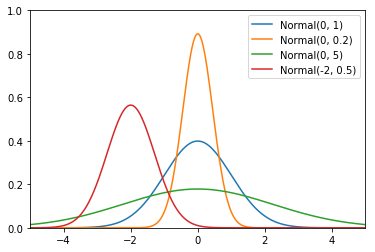

In [6]:
df1 = compute_probability_density_function(normal(0, 1), range_min, range_max, number_of_points)
df2 = compute_probability_density_function(normal(0, 0.2), range_min, range_max, number_of_points)
df3 = compute_probability_density_function(normal(0, 5), range_min, range_max, number_of_points)
df4 = compute_probability_density_function(normal(-2, 0.5), range_min, range_max, number_of_points)

ax1 = df1.rename(columns={"X": "Normal(0, 1)"}).plot()
ax2 = df2.rename(columns={"X": "Normal(0, 0.2)"}).plot(ax=ax1)
ax3 = df3.rename(columns={"X": "Normal(0, 5)"}).plot(ax=ax2)
ax4 = df4.rename(columns={"X": "Normal(-2, 0.5)"}).plot(ax=ax3)
ax4.set_ylim(0,1)
ax4;

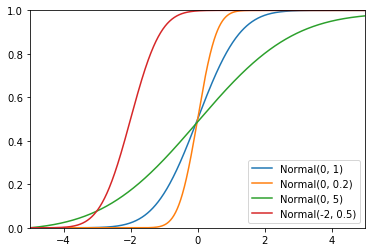

In [7]:
df1 = compute_cumulative_distribution_function(normal(0, 1), range_min, range_max, number_of_points)
df2 = compute_cumulative_distribution_function(normal(0, 0.2), range_min, range_max, number_of_points)
df3 = compute_cumulative_distribution_function(normal(0, 5), range_min, range_max, number_of_points)
df4 = compute_cumulative_distribution_function(normal(-2, 0.5), range_min, range_max, number_of_points)

ax1 = df1.rename(columns={"X": "Normal(0, 1)"}).plot()
ax2 = df2.rename(columns={"X": "Normal(0, 0.2)"}).plot(ax=ax1)
ax3 = df3.rename(columns={"X": "Normal(0, 5)"}).plot(ax=ax2)
ax4 = df4.rename(columns={"X": "Normal(-2, 0.5)"}).plot(ax=ax3)
ax4.set_ylim(0,1)
ax4;

<a id="exponential">
# Exponential Distribution

In [8]:
range_min = 0
range_max = 5
number_of_points = 1000

In [9]:
def exponential(beta):
    factor = 1 / beta
    return lambda x: factor * exp(-1 * factor * x)

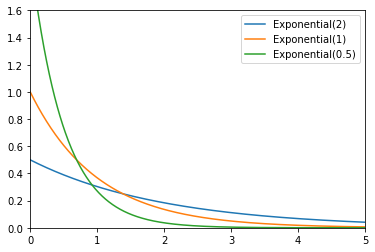

In [10]:
df1 = compute_probability_density_function(exponential(2), range_min, range_max, number_of_points)
df2 = compute_probability_density_function(exponential(1), range_min, range_max, number_of_points)
df3 = compute_probability_density_function(exponential(0.5), range_min, range_max, number_of_points)

ax1 = df1.rename(columns={"X": "Exponential(2)"}).plot()
ax2 = df2.rename(columns={"X": "Exponential(1)"}).plot(ax=ax1)
ax3 = df3.rename(columns={"X": "Exponential(0.5)"}).plot(ax=ax2)
ax3.set_ylim(0,1.6)
ax3.set_xlim(0,5)
ax3;

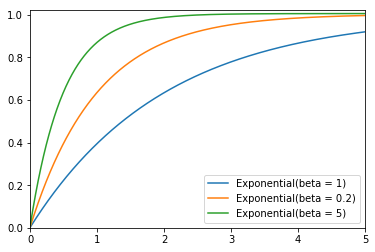

In [11]:
df1 = compute_cumulative_distribution_function(exponential(2), range_min, range_max, number_of_points)
df2 = compute_cumulative_distribution_function(exponential(1), range_min, range_max, number_of_points)
df3 = compute_cumulative_distribution_function(exponential(0.5), range_min, range_max, number_of_points)

ax1 = df1.rename(columns={"X": "Exponential(beta = 1)"}).plot()
ax2 = df2.rename(columns={"X": "Exponential(beta = 0.2)"}).plot(ax=ax1)
ax3 = df3.rename(columns={"X": "Exponential(beta = 5)"}).plot(ax=ax2)
ax3.set_ylim(0,1.02)
ax3.set_xlim(0,5)
ax3;